# DeviaMetric - Dynamique Structurelle 📊

---

## À propos de DeviaMetric 🌟

Le RMSD est une mesure couramment utilisée en bio-informatique pour évaluer la similarité structurelle entre deux ensembles d'atomes. Plus précisément, il quantifie la moyenne des distances entre les atomes de référence (structure fixe) et les atomes mobiles d'une trajectoire, après une superposition optimale. 

Dans ce jupyter notebook, nous allons analyser la dynamique structurelle de la barstar sous forme liée (Holo) ou non liée (Apo) à la barnase. Nous allons calculer le RMSD de chaque frame de la trajectoire par rapport à la structure de référence et visualiser les résultats.

---

## Configuration Requise 🔧

Avant de commencer, assurez-vous d'avoir installé les dépendances suivantes :
- [MDAnalysis](https://userguide.mdanalysis.org/1.0.1/index.html)

---

**Remarque :** Ce notebook est interactif et nécessite une exécution cellule par cellule pour afficher les résultats.


## I. Chargement des librairies

In [27]:
import warnings
import MDAnalysis as mda
from MDAnalysis import Universe
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rms
import pandas as pd


In [2]:
# pour ignorer les warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## II. Forme Apo de la barstar

In [30]:
# Chargement des fichiers dans un objet Universe
barstar_apo_mobile = Universe("start_prot_only.pdb", "md_prot_only_skip10.xtc")
barstar_apo_ref = Universe("start_prot_only.pdb", "md_prot_only_skip10.xtc")

In [31]:
# Récupérer le type d'alignement depuis l'entrée utilisateur
input_align = input("Type d'alignement (CA, protein, all, backbone, resid): ")

# Définir une variable pour stocker la sélection
selection = None

# Mapper les choix de l'utilisateur aux critères de sélection correspondants
if input_align == "CA":
    selection = "name CA"
elif input_align == "protein":
    selection = "protein"
elif input_align == "all":
    selection = "all"
elif input_align == "backbone":
    selection = "backbone"
elif input_align == "resid":
    residue_number = input("Numéro de résidu : ")
    selection = f"resid {residue_number}"
print(f"Sélection utilisée pour l'alignement : {selection}")

Sélection utilisée pour l'alignement : name CA


In [32]:
R = rms.RMSD(barstar_apo_mobile,  # universe to align
             barstar_apo_ref,  # reference universe or atomgroup
             select=selection,  # group to superimpose and calculate RMSD
             ref_frame=0)  # frame index of the reference
R.run()

In [33]:
df = pd.DataFrame(R.rmsd,
                  columns=['Time (ps)', 'Time (ns)',
                           selection])
df

,Time (ps),Time (ns),name CA
0,0.0,0.000000,3.501835e-07
1,1.0,10.000000,8.950366e-01
2,2.0,20.000000,8.961086e-01
3,3.0,30.000002,8.596646e-01
4,4.0,40.000000,9.368577e-01
...,...,...,...
1996,1996.0,19960.000000,1.440696e+00
1997,1997.0,19970.000000,1.480551e+00
1998,1998.0,19980.000000,1.345616e+00
1999,1999.0,19990.000000,1.485571e+00


Text(0, 0.5, 'RMSD ($\\AA$)')

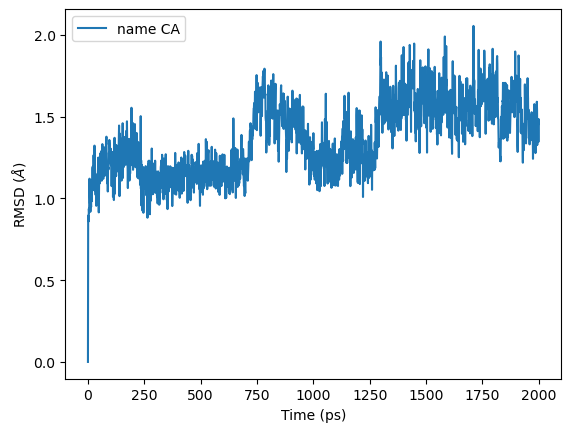

In [34]:
ax = df.plot(x='Time (ps)', y=[selection],
             kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')

## III. Forme Holo de la barstar :

In [36]:
# Chargement des fichiers dans un objet Universe
barstar_holo_mobile = Universe("start_prot_only.gro", "md_prot_only_OK.xtc")
barstar_holo_ref = Universe("start_prot_only.gro", "md_prot_only_OK.xtc")

In [37]:
# Récupérer le type d'alignement depuis l'entrée utilisateur
input_align = input("Type d'alignement (CA, protein, all, backbone, resid): ")

# Définir une variable pour stocker la sélection
selection = None

# Mapper les choix de l'utilisateur aux critères de sélection correspondants
if input_align == "CA":
    selection = "name CA"
elif input_align == "protein":
    selection = "protein"
elif input_align == "all":
    selection = "all"
elif input_align == "backbone":
    selection = "backbone"
elif input_align == "resid":
    residue_number = input("Numéro de résidu : ")
    selection = f"resid {residue_number}"
print(f"Sélection utilisée pour l'alignement : {selection}")

Sélection utilisée pour l'alignement : name CA


In [38]:
R2 = rms.RMSD(barstar_holo_mobile,  # universe to align
             barstar_holo_ref,  # reference universe or atomgroup
             select=selection,  # group to superimpose and calculate RMSD
             ref_frame=0)  # frame index of the reference
R2.run()

In [40]:
df2 = pd.DataFrame(R2.rmsd,
                  columns=['Time (ps)', 'Time (ns)',
                           selection])
df2

,Time (ps),Time (ns),name CA
0,0.0,0.0,5.408334e-07
1,1.0,100.0,1.059141e+00
2,2.0,200.0,9.681799e-01
3,3.0,300.0,1.167595e+00
4,4.0,400.0,1.047348e+00
...,...,...,...
1756,1756.0,175600.0,1.758478e+00
1757,1757.0,175700.0,1.822030e+00
1758,1758.0,175800.0,1.914629e+00
1759,1759.0,175900.0,1.875127e+00


Attention, dans un fichier .gro les distances sont en nm, il faut donc les convertir en angstroms pour les comparer avec les distances des fichiers .pdb.

In [41]:
df2[selection] = df2[selection] * 10  # Conversion de nanomètres en Angstroms (1 nm = 10 Å)

Text(0, 0.5, 'RMSD ($\\AA$)')

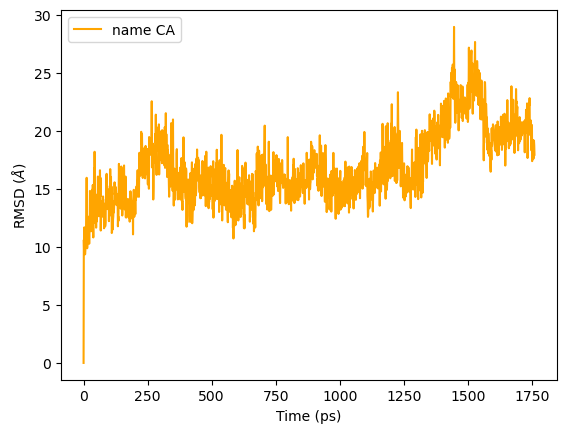

In [43]:
# affichage des résultats
ax = df2.plot(x='Time (ps)', y=[selection],
             kind='line', color='orange')
ax.set_ylabel(r'RMSD ($\AA$)')

## IV. RMSD croisé entre les deux formes non complexées de la barstar :

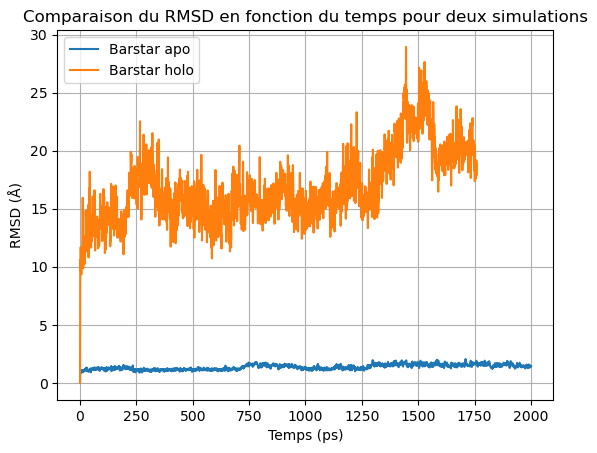

In [44]:
# Tracer les deux courbes
plt.plot(df['Time (ps)'], df[selection], label='Barstar apo')
plt.plot(df2['Time (ps)'], df2[selection], label='Barstar holo')

# Ajouter une légende
plt.legend()

# Ajouter les étiquettes des axes et le titre
plt.xlabel('Temps (ps)')
plt.ylabel('RMSD (Å)')
plt.title('Comparaison du RMSD en fonction du temps pour deux simulations')

# Afficher la grille
plt.grid(True)

# Afficher le graphique
plt.show()

